<a href="https://colab.research.google.com/github/mohmaed7777/covid19-vaccinations-process/blob/main/pandas_Time_Series_Analysis_on_Covid_19_vaccination_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing:**

In [36]:
import pandas as pd 
import datetime as datetime 
from datetime  import timedelta
from dateutil.relativedelta import relativedelta
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
sns.set()
print('Setup completed ^_____^')

Setup completed ^_____^


In [37]:
df = pd.read_csv('/content/country_vaccinations_by_manufacturer.csv')
df.head()

,location,date,vaccine,total_vaccinations
0,Austria,2021-01-08,Johnson&Johnson,0
1,Austria,2021-01-08,Moderna,0
2,Austria,2021-01-08,Oxford/AstraZeneca,0
3,Austria,2021-01-08,Pfizer/BioNTech,31408
4,Austria,2021-01-15,Johnson&Johnson,0


In [38]:
df.tail()

,location,date,vaccine,total_vaccinations
24985,European Union,2021-12-21,Oxford/AstraZeneca,67293559
24986,European Union,2021-12-21,Pfizer/BioNTech,500549129
24987,European Union,2021-12-21,Sinopharm/Beijing,2222929
24988,European Union,2021-12-21,Sinovac,9
24989,European Union,2021-12-21,Sputnik V,1845078


**EDA:-**

In [39]:
df.nunique()

location                 40
date                    374
vaccine                   8
total_vaccinations    21795
dtype: int64

In [40]:
df.dtypes

location              object
date                  object
vaccine               object
total_vaccinations     int64
dtype: object

In [41]:
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")

In [42]:
df.dtypes

location                      object
date                  datetime64[ns]
vaccine                       object
total_vaccinations             int64
dtype: object

In [43]:
# Check the missing values: 
missing_values = df.isnull().sum()
missing_values[:]

location              0
date                  0
vaccine               0
total_vaccinations    0
dtype: int64

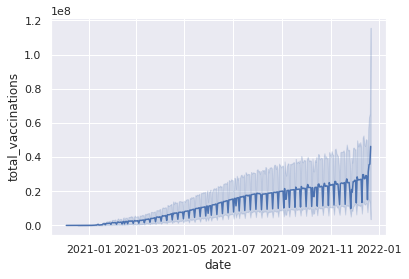

In [44]:
sns.lineplot(x=df['date'], y=df['total_vaccinations'])

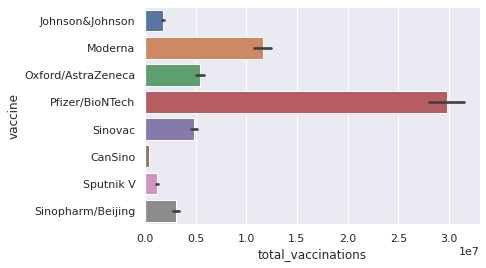

In [45]:
sns.barplot(x=df['total_vaccinations'], y=df['vaccine'])

#**Simplify Time Series Data Using pandas:-**

Starting with simplifying the input data to explore data, we will look at **total of vaccincations** by **date** and the **type of vaccine**, this is allow us to look at time series dataset with mulitible time series.

In [46]:
df.columns

Index(['location', 'date', 'vaccine', 'total_vaccinations'], dtype='object')

In [47]:
df.dtypes

location                      object
date                  datetime64[ns]
vaccine                       object
total_vaccinations             int64
dtype: object

In [48]:
variables = ['date', 'vaccine', 'total_vaccinations']
group_variables = variables[:2]
outcome_variable = variables[2]
data = df.groupby(group_variables)[outcome_variable].sum().reset_index()

In [49]:
data.head()

,date,vaccine,total_vaccinations
0,2020-12-04,Moderna,1
1,2020-12-07,Pfizer/BioNTech,1
2,2020-12-09,Pfizer/BioNTech,2
3,2020-12-15,Pfizer/BioNTech,3
4,2020-12-16,Pfizer/BioNTech,4


In [50]:
data.tail()

,date,vaccine,total_vaccinations
2744,2021-12-21,Oxford/AstraZeneca,69352175
2745,2021-12-21,Pfizer/BioNTech,514601597
2746,2021-12-21,Sinopharm/Beijing,2222929
2747,2021-12-21,Sinovac,9
2748,2021-12-21,Sputnik V,1845078


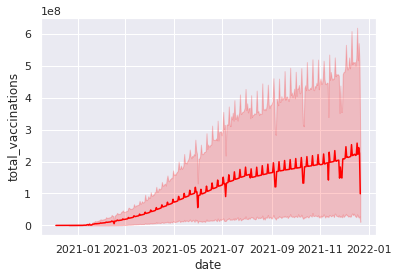

In [51]:
sns.lineplot(x=data['date'], y=data['total_vaccinations'], color='red')

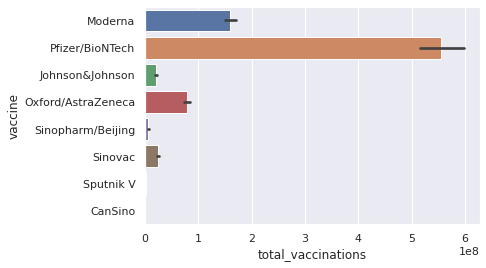

In [17]:
sns.barplot(x=data['total_vaccinations'], y=data['vaccine'])

#**Subsetting data:-**


In [52]:
data.set_index('date', inplace=True)

In [53]:
data.head()

,vaccine,total_vaccinations
date,,
2020-12-04,Moderna,1
2020-12-07,Pfizer/BioNTech,1
2020-12-09,Pfizer/BioNTech,2
2020-12-15,Pfizer/BioNTech,3
2020-12-16,Pfizer/BioNTech,4


In [54]:
print(data.index)

DatetimeIndex(['2020-12-04', '2020-12-07', '2020-12-09', '2020-12-15',
               '2020-12-16', '2020-12-17', '2020-12-18', '2020-12-20',
               '2020-12-20', '2020-12-21',
               ...
               '2021-12-20', '2021-12-20', '2021-12-20', '2021-12-21',
               '2021-12-21', '2021-12-21', '2021-12-21', '2021-12-21',
               '2021-12-21', '2021-12-21'],
              dtype='datetime64[ns]', name='date', length=2749, freq=None)


In [55]:
# Get the observations of 2020:- 
print(data['2020'].head())
print(data['2020'].tail())

                    vaccine  total_vaccinations
date                                           
2020-12-04          Moderna                   1
2020-12-07  Pfizer/BioNTech                   1
2020-12-09  Pfizer/BioNTech                   2
2020-12-15  Pfizer/BioNTech                   3
2020-12-16  Pfizer/BioNTech                   4
                       vaccine  total_vaccinations
date                                              
2020-12-31  Oxford/AstraZeneca                   6
2020-12-31     Pfizer/BioNTech              568935
2020-12-31   Sinopharm/Beijing                   0
2020-12-31             Sinovac                   0
2020-12-31           Sputnik V                   0


**Datetime Components:-**
Pandas Datetime variables have a number of useful components. Using the DatetimeIndex, we can extract items like month, year, day of week, quarter, etc.

In [56]:
print('Day:', data.index.day, '\n')
print('Week:', data.index.week, '\n')
data['dayofweek'] = data.index.dayofweek # Day of Week: Monday=0, Sunday=6
print(data.head())
print(data.tail())
del(data['dayofweek'])

Day: Int64Index([ 4,  7,  9, 15, 16, 17, 18, 20, 20, 21,
            ...
            20, 20, 20, 21, 21, 21, 21, 21, 21, 21],
           dtype='int64', name='date', length=2749) 

Week: Int64Index([49, 50, 50, 51, 51, 51, 51, 51, 51, 52,
            ...
            51, 51, 51, 51, 51, 51, 51, 51, 51, 51],
           dtype='int64', name='date', length=2749) 

                    vaccine  total_vaccinations  dayofweek
date                                                      
2020-12-04          Moderna                   1          4
2020-12-07  Pfizer/BioNTech                   1          0
2020-12-09  Pfizer/BioNTech                   2          2
2020-12-15  Pfizer/BioNTech                   3          1
2020-12-16  Pfizer/BioNTech                   4          2
                       vaccine  total_vaccinations  dayofweek
date                                                         
2021-12-21  Oxford/AstraZeneca            69352175          1
2021-12-21     Pfizer/BioNTech          

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


In [57]:
data.head()

,vaccine,total_vaccinations
date,,
2020-12-04,Moderna,1
2020-12-07,Pfizer/BioNTech,1
2020-12-09,Pfizer/BioNTech,2
2020-12-15,Pfizer/BioNTech,3
2020-12-16,Pfizer/BioNTech,4


#**Standardizing the DatetimeIndex:-**
While data from existing variables may be sufficient, some Time Series applications require that data contain all periods and have a Frequency assigned. We can see above that our data do not have a frequency (freq=None). While the data seem daily, there are many types of possible frequencies (business days, weekdays, etc.). If the input data are already standardized, Pandas will infer a Frequency and assign it. Otherwise, we need to ensure there are:

 * **No duplicate index values**
 * **No missing index values**

 
Setting a Frequency helps ensure the data are standardized and will work in applications, and is also required for functionality like resampling.


**Pivoting Data:-**

In [58]:
data.reset_index(inplace=True)

data_pivot= data.pivot(index='date', columns='vaccine', values='total_vaccinations')
data_pivot.head()

vaccine,CanSino,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinovac,Sputnik V
date,,,,,,,,
2020-12-04,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2020-12-07,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2020-12-09,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
2020-12-15,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
2020-12-16,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN


In [59]:
data_pivot.tail()

vaccine,CanSino,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinovac,Sputnik V
date,,,,,,,,
2021-12-17,573549.0,54702175.0,381481627.0,163777073.0,1.393835e+09,22135407.0,40090190.0,3652470.0
2021-12-18,573552.0,45564946.0,354933389.0,120332705.0,1.198786e+09,19940250.0,40119848.0,1845078.0
2021-12-19,NaN,45597717.0,356576135.0,114927940.0,1.167855e+09,2222929.0,15864645.0,1845078.0
2021-12-20,NaN,42661987.0,334888827.0,119690363.0,1.060181e+09,2222929.0,15904656.0,1845078.0
2021-12-21,NaN,18677142.0,86799132.0,69352175.0,5.146016e+08,2222929.0,9.0,1845078.0


In [60]:
# Convert NaN values with 0: 
data_pivot.fillna(0, axis=0, inplace=True)

In [61]:
data_pivot.head()

vaccine,CanSino,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinovac,Sputnik V
date,,,,,,,,
2020-12-04,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2020-12-07,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-12-09,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
2020-12-15,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
2020-12-16,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0


#**Stacking & Unstacking Method:-**

To achieve the same result in Pandas, it is often easier to use the Index and unstack / (stack) methods. The unstack method transforms long data into wide data by creating columns by category for levels of the index, while stack does the reverse.

Here, we can tell Pandas that the Date and vaccine values are part of the Index and use the unstack function to generate separate columns (this also removes the vaccine column from the Index):

In [70]:
vaccination_amount = data.set_index(['date', 'vaccine']).unstack('vaccine').fillna(0)

# Note -- 2 levels of column names, the original variables are in columns.levels[0], 
# newly-created category variable names are in columns.levels[1]. This can be reset completely:
# sales.columns = sales.columns.levels[1].rename(None)
# Alternatively, keeping 'Sales' as a level 0 name allows us to refer to the variables jointly (sales['Sales'])
vaccination_amount.columns = vaccination_amount.columns.levels[1].rename(None)
vaccination_amount.head()

,CanSino,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinovac,Sputnik V
date,,,,,,,,
2020-12-04,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2020-12-07,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-12-09,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
2020-12-15,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
2020-12-16,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0


,CanSino,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinovac,Sputnik V
date,,,,,,,,
2020-12-04,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2020-12-07,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-12-09,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
2020-12-15,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
2020-12-16,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0


In [72]:
print(vaccination_amount.index)
print('\nUnique dates in our data: ', len(vaccination_amount.index.unique()), 'Days')

DatetimeIndex(['2020-12-04', '2020-12-07', '2020-12-09', '2020-12-15',
               '2020-12-16', '2020-12-17', '2020-12-18', '2020-12-20',
               '2020-12-21', '2020-12-22',
               ...
               '2021-12-12', '2021-12-13', '2021-12-14', '2021-12-15',
               '2021-12-16', '2021-12-17', '2021-12-18', '2021-12-19',
               '2021-12-20', '2021-12-21'],
              dtype='datetime64[ns]', name='date', length=374, freq=None)

Unique dates in our data:  374 Days
